In [1]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings    
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
sales_df = pd.read_csv('Sales Data.csv')
store_df = pd.read_csv('store.csv')

In [3]:
sales_df.head(5)

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,0,221,3,2015-07-29,6302.7,496.8,0,0,1
1,1,503,4,2015-07-23,5745.0,432.0,1,0,1
2,2,220,4,2015-07-30,4673.0,629.0,0,0,1
3,3,371,4,2015-07-23,5317.0,442.0,1,0,0
4,4,1103,4,2015-07-23,5154.0,426.0,1,0,0


In [4]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
store_df.shape

(1115, 10)

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978359 entries, 0 to 978358
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     978359 non-null  int64  
 1   Store          978359 non-null  int64  
 2   DayOfWeek      978359 non-null  int64  
 3   Date           978359 non-null  object 
 4   Sales          978359 non-null  float64
 5   Customers      978359 non-null  float64
 6   Promo          978359 non-null  int64  
 7   StateHoliday   978359 non-null  object 
 8   SchoolHoliday  978359 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 67.2+ MB


In [7]:
sales_df.isnull().sum()

Unnamed: 0       0
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
sales_df['Promo'].value_counts()

Promo
1    601463
0    376896
Name: count, dtype: int64

In [9]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
# Dataset Duplicate Value Count
print(f'Duplicate values in the Sales_df dataset: {len(sales_df[sales_df.duplicated()])}')
print(f'Duplicate values in the Store_df dataset: {len(store_df[store_df.duplicated()])}')

Duplicate values in the Sales_df dataset: 0
Duplicate values in the Store_df dataset: 0


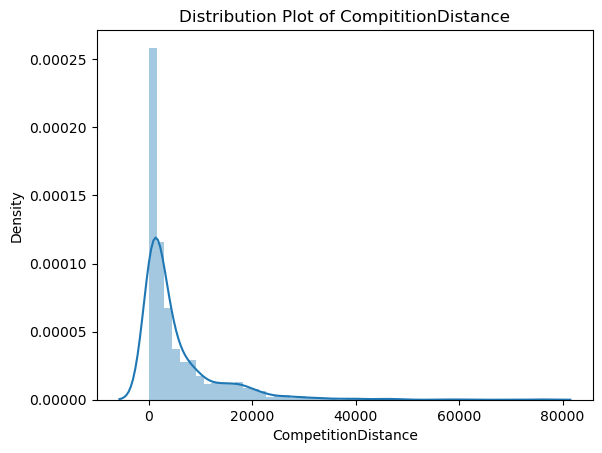

In [12]:
# Let's find the distribution of the CompititionDistance.
sns.distplot(store_df['CompetitionDistance'], hist = True)
plt.title('Distribution Plot of CompititionDistance')
plt.show()

In [13]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [14]:
store_df['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

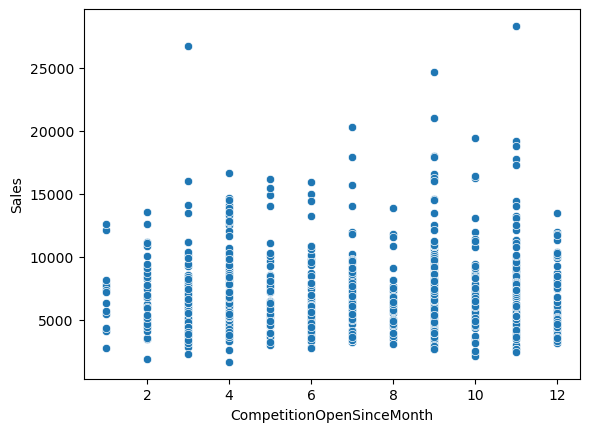

In [15]:
sns.scatterplot(x=store_df['CompetitionOpenSinceMonth'], y=sales_df['Sales'])
plt.show()

In [16]:
store_df['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

<Axes: xlabel='CompetitionOpenSinceYear', ylabel='Sales'>

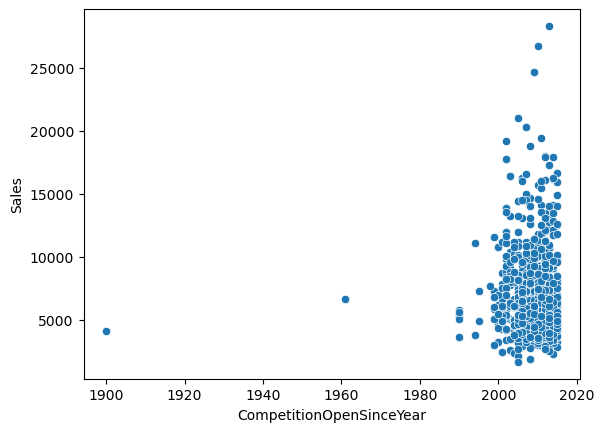

In [17]:
sns.scatterplot(x=store_df['CompetitionOpenSinceYear'], y=sales_df['Sales'])

In [18]:
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)

In [19]:
store_df['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

<Axes: xlabel='Promo2SinceWeek', ylabel='Sales'>

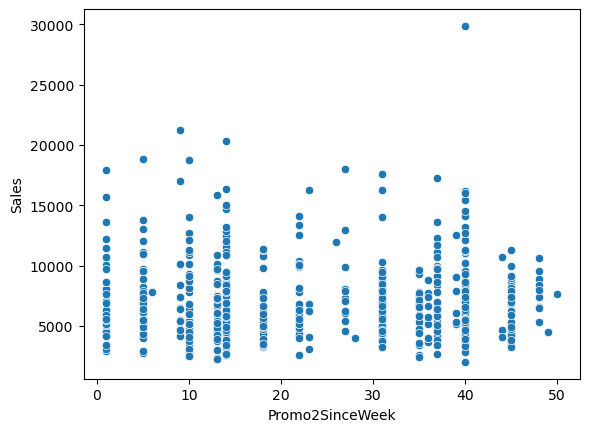

In [20]:
sns.scatterplot(x=store_df['Promo2SinceWeek'], y=sales_df['Sales'])

<Axes: xlabel='Promo2SinceYear', ylabel='Sales'>

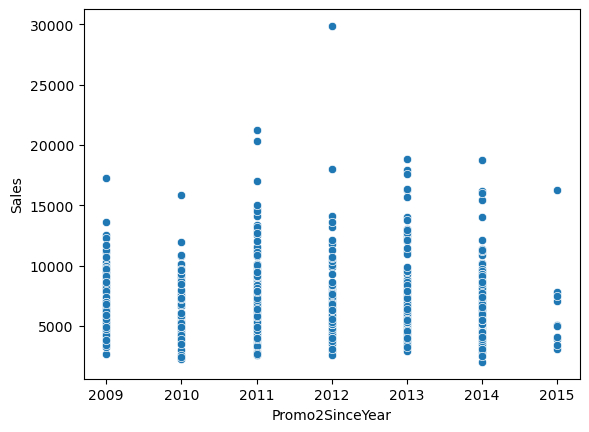

In [21]:
sns.scatterplot(x=store_df['Promo2SinceYear'], y=sales_df['Sales'])

In [22]:
store_df['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

<Axes: xlabel='PromoInterval', ylabel='Sales'>

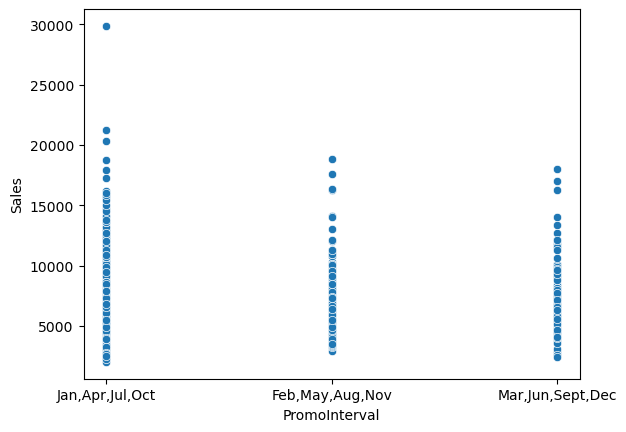

In [23]:
sns.scatterplot(x=store_df['PromoInterval'], y=sales_df['Sales'])

In [24]:
# Fill null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval columns with 0
store_df['Promo2SinceWeek'].fillna(0, inplace = True)
store_df['Promo2SinceYear'].fillna(0, inplace = True)
store_df['PromoInterval'].fillna(0, inplace = True)

In [25]:
# Number of missing values in the Store_df Dataset
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [26]:
df=sales_df.merge(store_df,on='Store',how ='left')

In [27]:
df.head()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,221,3,2015-07-29,6302.7,496.8,0,0,1,d,c,13530.0,9.0,2013.0,0,0.0,0.0,0
1,1,503,4,2015-07-23,5745.0,432.0,1,0,1,d,c,13080.0,9.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,2,220,4,2015-07-30,4673.0,629.0,0,0,1,a,a,1000.0,9.0,2008.0,0,0.0,0.0,0
3,3,371,4,2015-07-23,5317.0,442.0,1,0,0,d,c,1970.0,7.0,2009.0,1,45.0,2014.0,"Feb,May,Aug,Nov"
4,4,1103,4,2015-07-23,5154.0,426.0,1,0,0,d,c,1340.0,10.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978359 entries, 0 to 978358
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 978359 non-null  int64  
 1   Store                      978359 non-null  int64  
 2   DayOfWeek                  978359 non-null  int64  
 3   Date                       978359 non-null  object 
 4   Sales                      978359 non-null  float64
 5   Customers                  978359 non-null  float64
 6   Promo                      978359 non-null  int64  
 7   StateHoliday               978359 non-null  object 
 8   SchoolHoliday              978359 non-null  int64  
 9   StoreType                  978359 non-null  object 
 10  Assortment                 978359 non-null  object 
 11  CompetitionDistance        978359 non-null  float64
 12  CompetitionOpenSinceMonth  978359 non-null  float64
 13  CompetitionOpenSinceYear   97

In [29]:
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [30]:
df['StateHoliday']=df['StateHoliday'].replace({'0':0})

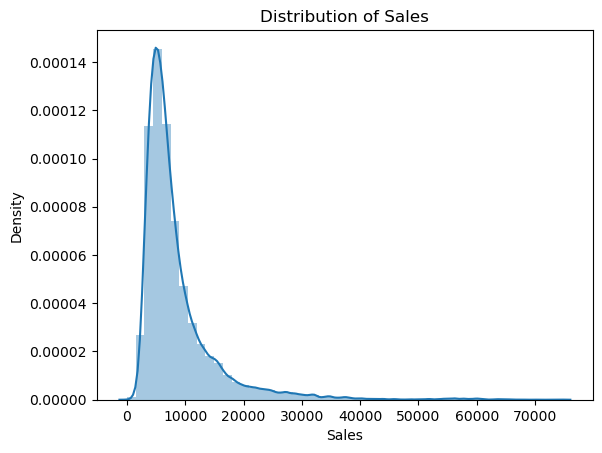

In [31]:
sns.distplot(df['Sales'], hist= True)
plt.title('Distribution of Sales')
plt.show()

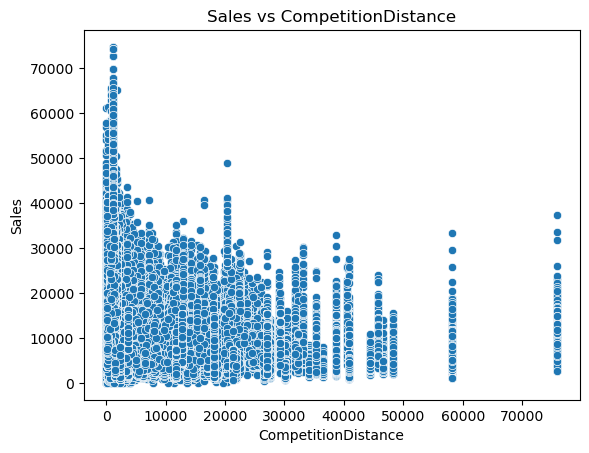

In [32]:
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])
plt.title('Sales vs CompetitionDistance')
plt.show()

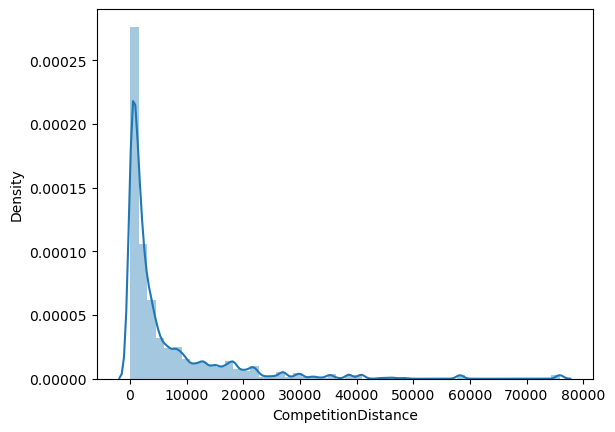

In [33]:
sns.distplot(df['CompetitionDistance'], hist = True)
plt.show()

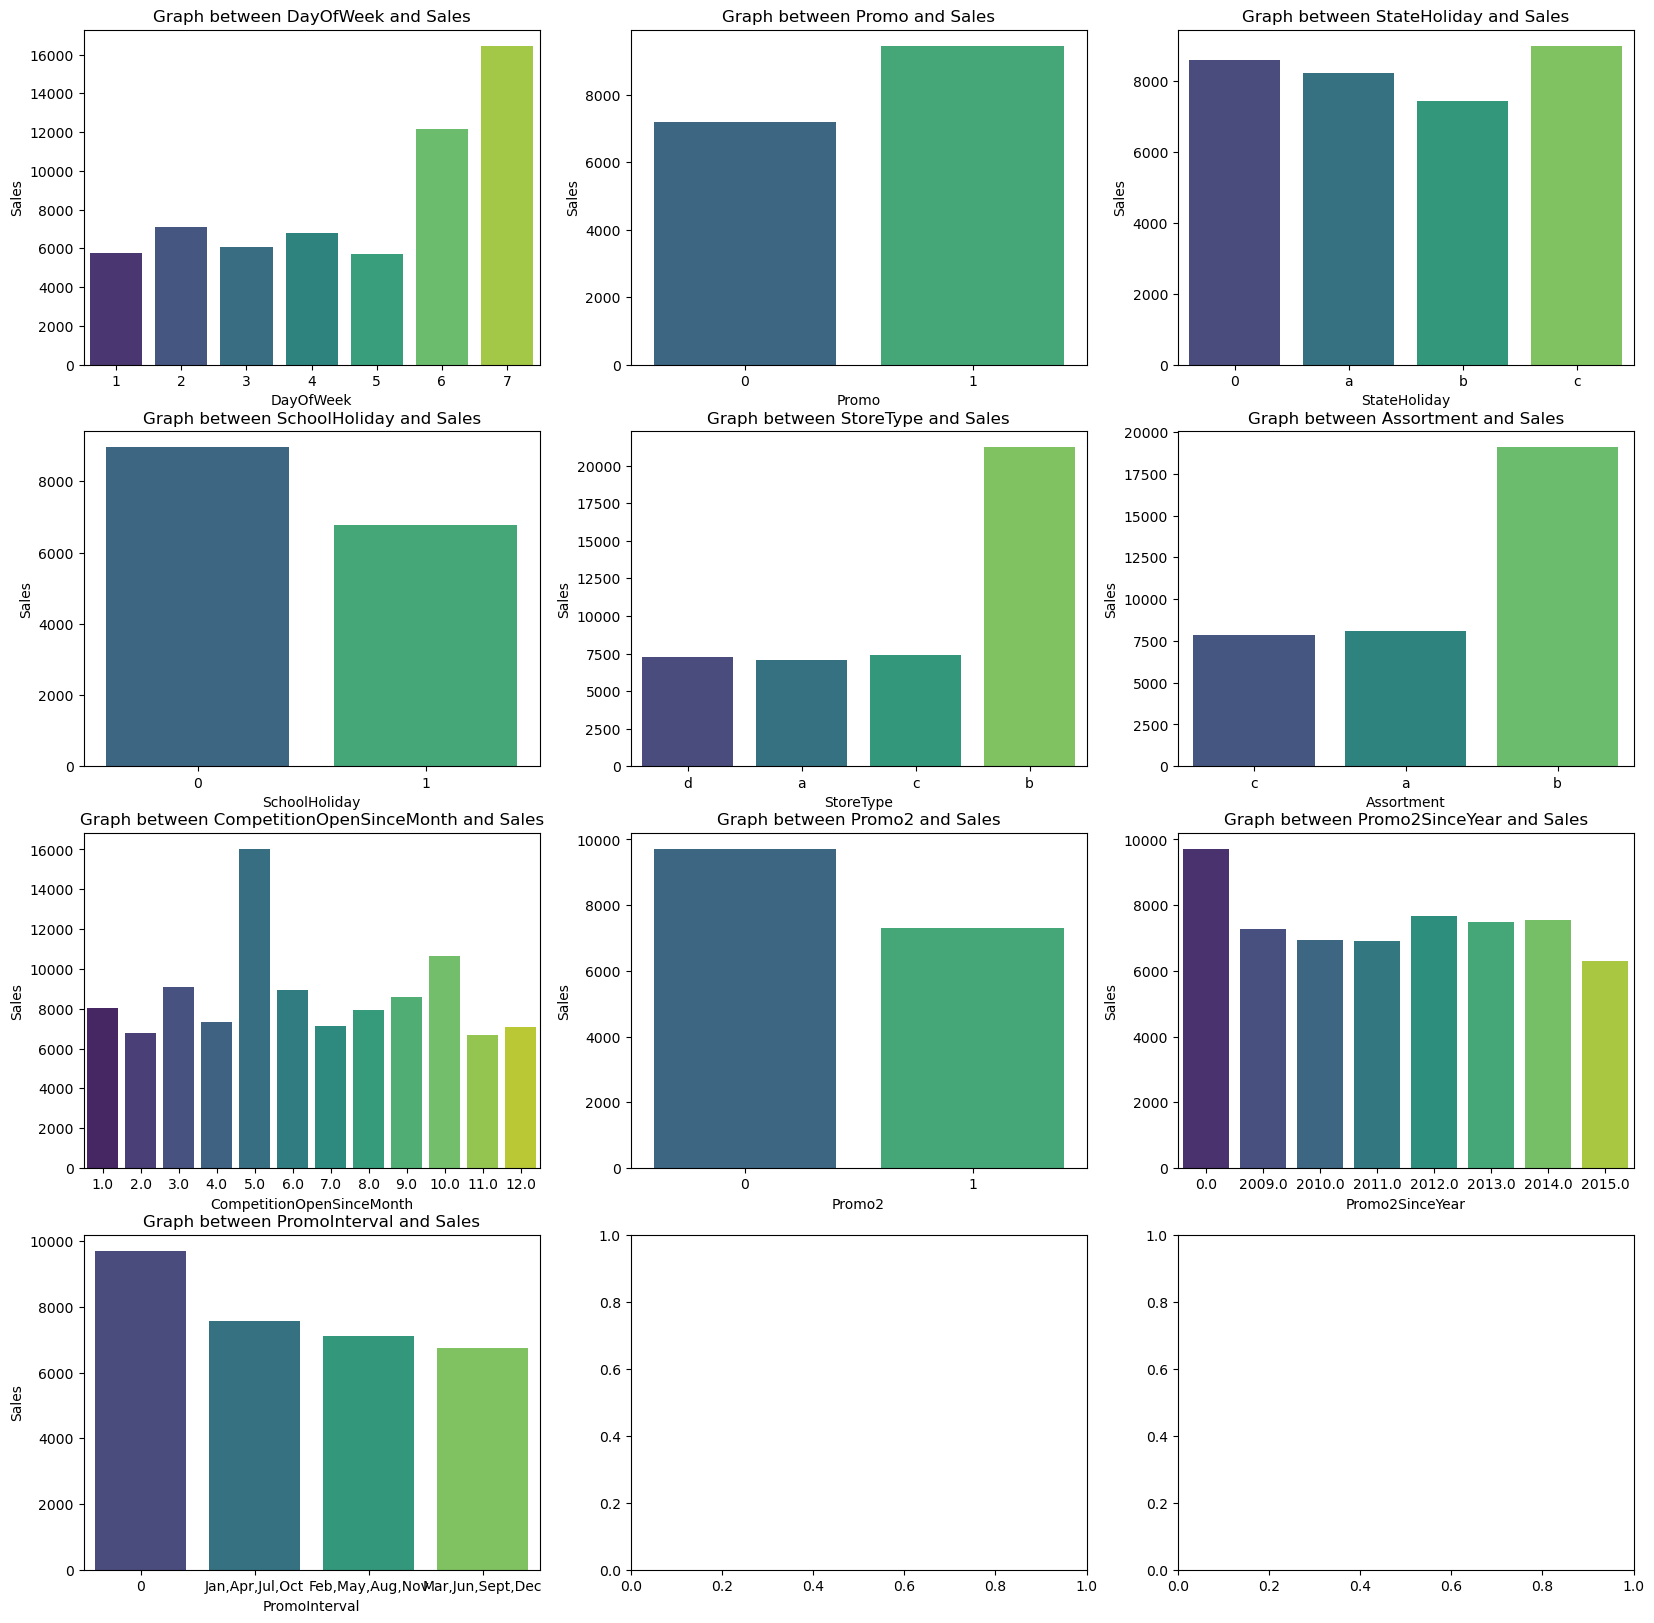

In [34]:
categorical_variables = ['DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']

fig, axs = plt.subplots(4, 3,figsize=(20, 20))
j=0
k=-1
for i in categorical_variables:
  k+=1
  if k>2:
    k=0
    j+=1
  sns.barplot(x=df[i], y='Sales', data=df, ci=None, ax=axs[j, k],palette='viridis')
  axs[j,k].set(title = f'Graph between {i} and Sales', xlabel=i, ylabel='Sales')

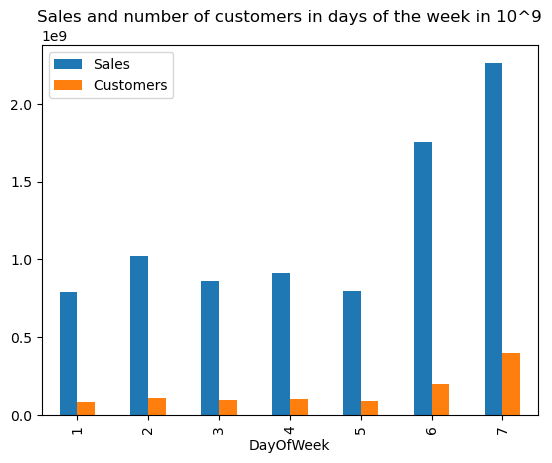

In [35]:
df.groupby("DayOfWeek")[["Sales", "Customers"]].sum().plot.bar(title = 'Sales and number of customers in days of the week in 10^9')
plt.show()

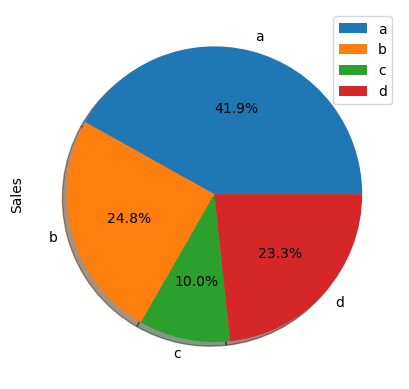

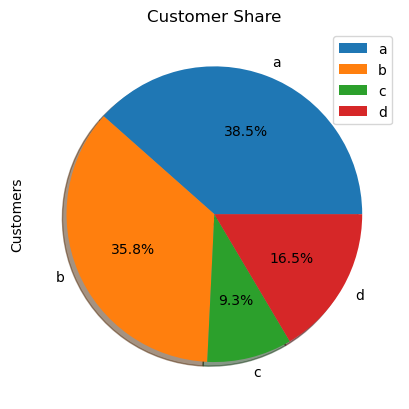

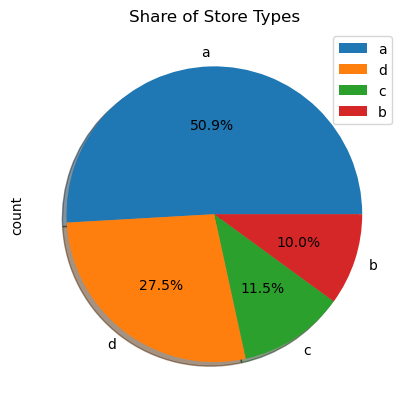

In [36]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

In [38]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear
df['DayOfMonth'] = df['Date'].dt.day

In [39]:
df['Year'].unique()

array([2015, 2014, 2013])

In [40]:
sales_2013 = df[df['Year'] == 2013].groupby('Month')['Sales'].sum().reset_index()
sales_2014 = df[df['Year'] == 2014].groupby('Month')['Sales'].sum().reset_index()
sales_2015 = df[df['Year'] == 2015].groupby('Month')['Sales'].sum().reset_index()

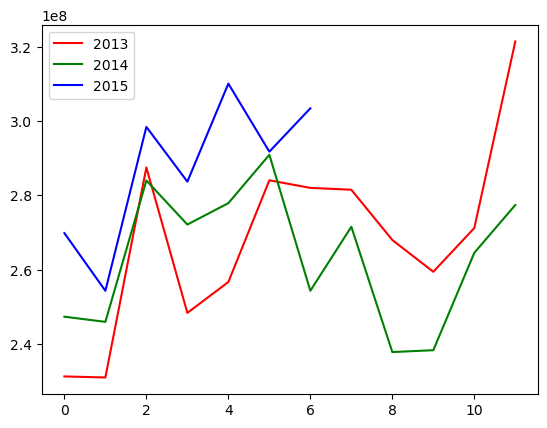

In [41]:
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='red')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='green')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='blue')
plt.legend()

In [42]:
df['CompetitionOpen'] = (df['Year'] - df['CompetitionOpenSinceYear'])*12 + (df['Month'] - df['CompetitionOpenSinceMonth'])
df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

<Axes: xlabel='StoreType', ylabel='Sales'>

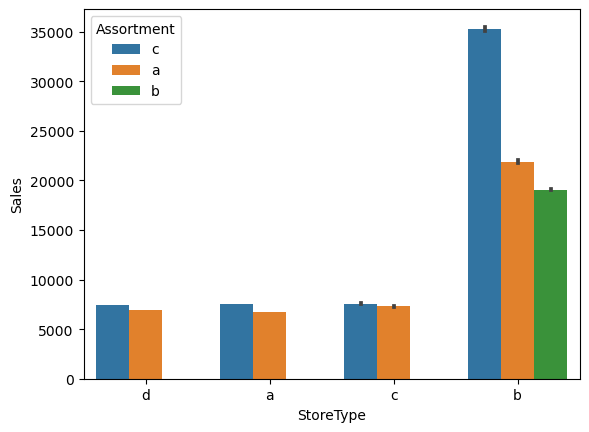

In [43]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

In [44]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")[["Sales","Customers"]].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3.517667e+09,4.120991e+08
1,b,2.083782e+09,3.832142e+08
3,d,1.955382e+09,1.765041e+08
2,c,8.391835e+08,9.956097e+07


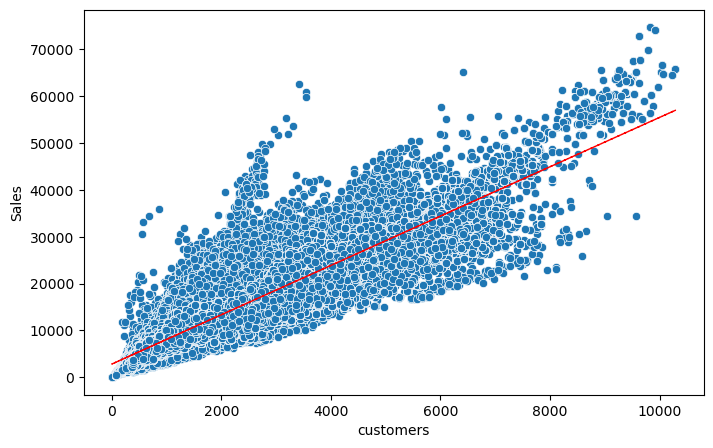

In [45]:
fig = plt.figure(figsize=(8, 5))
ax = fig.gca()
feature = df['Customers']
label = df['Sales']
correlation = feature.corr(label)
sns.scatterplot(x=feature, y=label)
plt.xlabel('customers')
plt.ylabel('Sales')
z = np.polyfit(df['Customers'], df['Sales'], 1)  
y_hat1 = np.poly1d(z)   
y_hat = y_hat1(df['Customers']) 

plt.plot(df['Customers'], y_hat, "r--", lw=1)

plt.show()

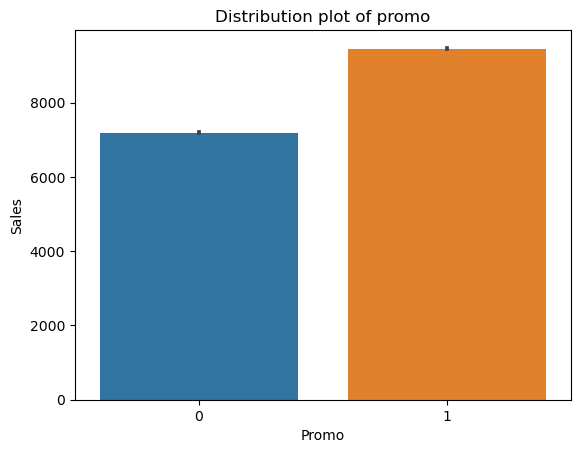

In [46]:
sns.barplot(x=df['Promo'],y=df['Sales'])
plt.title('Distribution plot of promo')
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978359 entries, 0 to 978358
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           978359 non-null  int64         
 1   Store                978359 non-null  int64         
 2   DayOfWeek            978359 non-null  int64         
 3   Date                 978359 non-null  datetime64[ns]
 4   Sales                978359 non-null  float64       
 5   Customers            978359 non-null  float64       
 6   Promo                978359 non-null  int64         
 7   StateHoliday         978359 non-null  object        
 8   SchoolHoliday        978359 non-null  int64         
 9   StoreType            978359 non-null  object        
 10  Assortment           978359 non-null  object        
 11  CompetitionDistance  978359 non-null  float64       
 12  Promo2               978359 non-null  int64         
 13  Promo2SinceWee

In [48]:
df['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [49]:
#changing into boolean 
df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [50]:
df.columns

Index(['Unnamed: 0', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear',
       'PromoInterval', 'Year', 'Month', 'WeekOfYear', 'DayOfYear',
       'DayOfMonth', 'CompetitionOpen'],
      dtype='object')

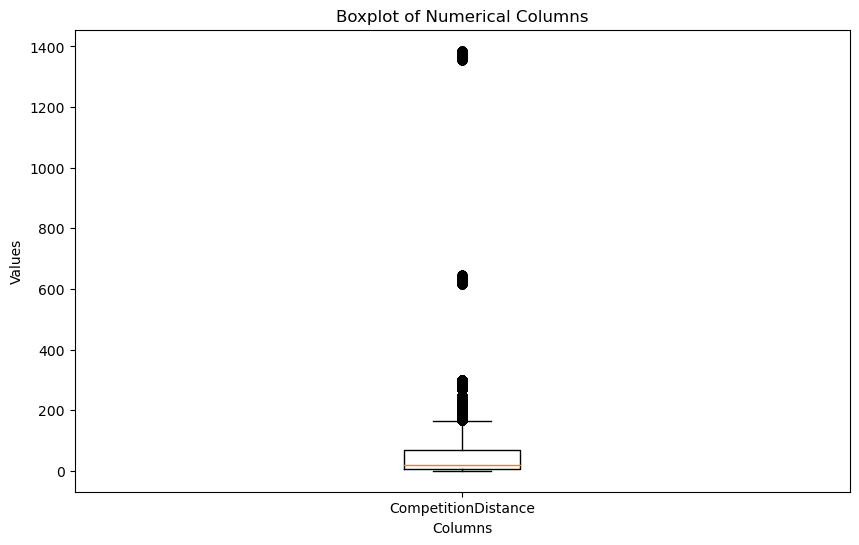

In [51]:
# Create a boxplot for all numerical columns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Specify the data and column names
data_to_plot = [ df['CompetitionOpen']]
column_names = ['CompetitionDistance']

# Create the boxplot
plt.boxplot(data_to_plot, labels=column_names)

# Add title and labels
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()

In [52]:
df=df[df['CompetitionDistance']<40000]

In [53]:
df=df[df['CompetitionOpen']<400]

In [54]:
df.shape

(960412, 22)

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

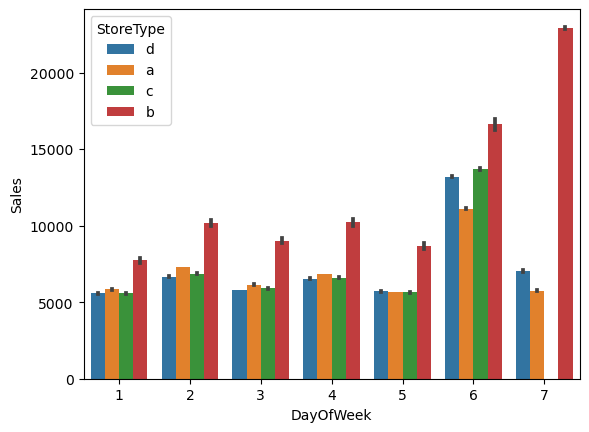

In [55]:
sns.barplot(x=df['DayOfWeek'],y=df["Sales"],hue=df['StoreType'])

Text(0.5, 1.0, 'Monthly Sales')

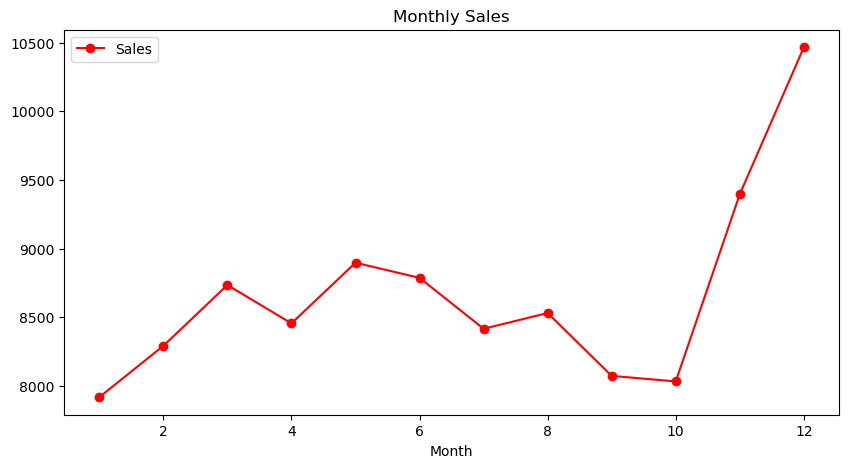

In [56]:
axis = df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Monthly Sales')

Text(0.5, 1.0, 'One month sales')

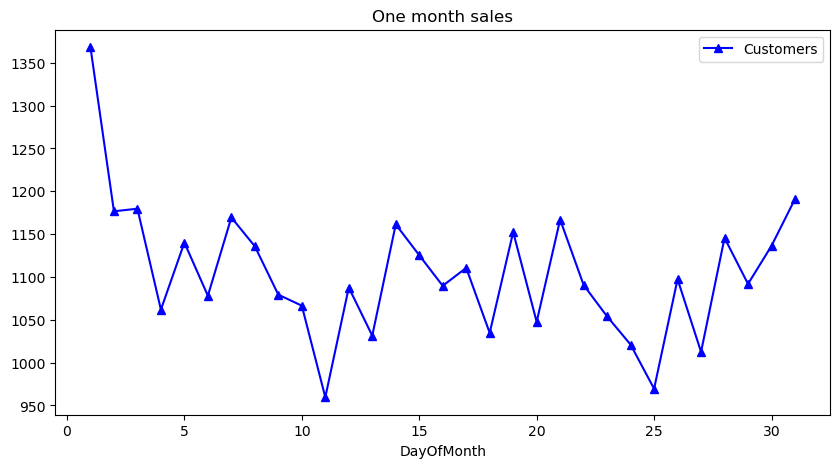

In [57]:
axis = df.groupby('DayOfMonth')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('One month sales')

In [58]:
cols=['DayOfWeek', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Assortment', 'CompetitionDistance',
       'Promo2', 'Month', 'CompetitionOpen','Sales']
pred_df=pd.DataFrame()
for col in cols:
    pred_df[col]=df[col]

In [59]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960412 entries, 0 to 978358
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            960412 non-null  int64  
 1   Customers            960412 non-null  float64
 2   Promo                960412 non-null  int64  
 3   StateHoliday         960412 non-null  int64  
 4   SchoolHoliday        960412 non-null  int64  
 5   Assortment           960412 non-null  object 
 6   CompetitionDistance  960412 non-null  float64
 7   Promo2               960412 non-null  int64  
 8   Month                960412 non-null  int32  
 9   CompetitionOpen      960412 non-null  float64
 10  Sales                960412 non-null  float64
dtypes: float64(4), int32(1), int64(5), object(1)
memory usage: 84.3+ MB


In [60]:
pred_df['Assortment'].unique()

array(['c', 'a', 'b'], dtype=object)

In [61]:
pred_df['Assortment']=pred_df['Assortment'].replace({'a':0,'b':1,'c':2})

In [76]:
pred_df.to_csv('pred_data.csv')

<Axes: >

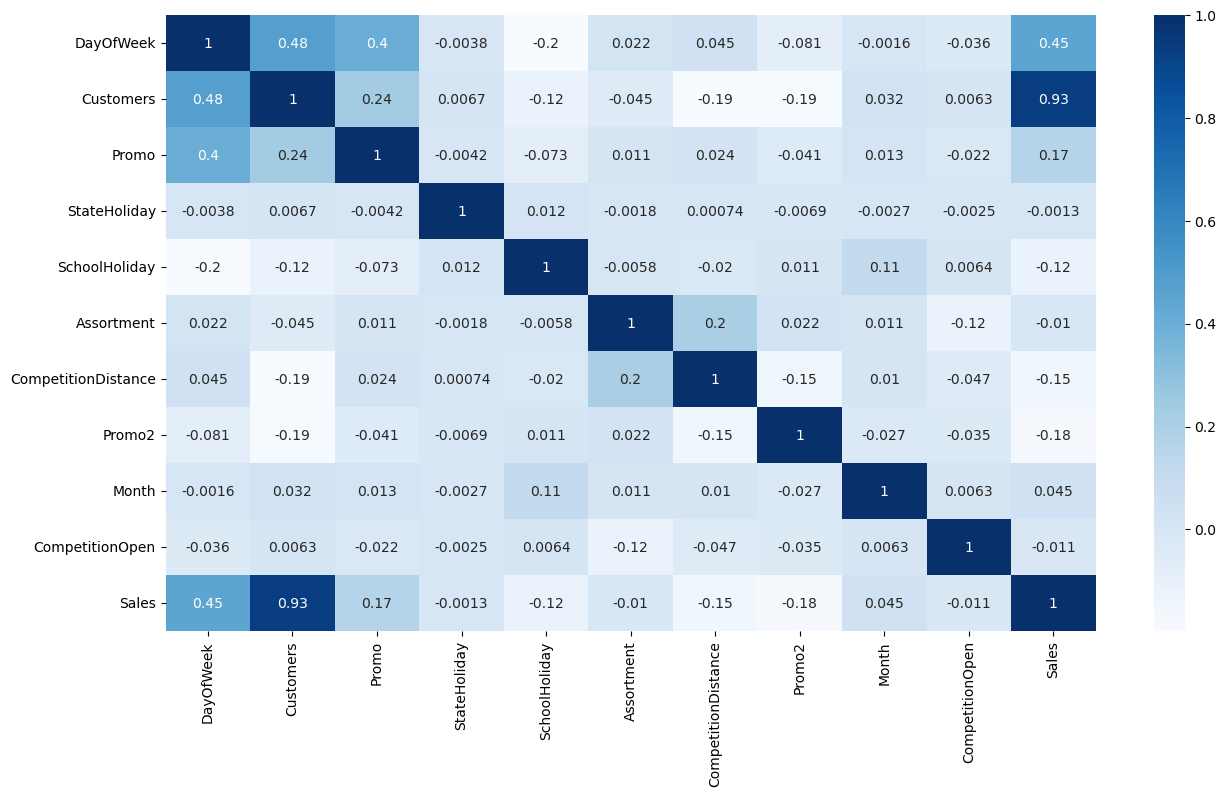

In [62]:
corr=pred_df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot=True, cmap = 'Blues')

In [63]:
x=pred_df.drop('Sales',axis=1)
y=pred_df['Sales']

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
from sklearn import metrics
score1=metrics.r2_score(y_test,y_pred1)
mse1=mean_absolute_error(y_test,y_pred1)
def rmse(y_test,y_pred1):
    return np.sqrt(np.mean((y_test - y_pred1)**2))
print('R2_score :',score1)
print("Mean absolute Error:", mse1)
print("RMSE:", rmse(y_test, y_pred1))

R2_score : 0.8734480820046474
Mean absolute Error: 1600.7507074232542
RMSE: 2450.040283039418


In [66]:
from sklearn.linear_model import PassiveAggressiveRegressor
pas=PassiveAggressiveRegressor(C=3,epsilon=0.2,tol=1e-2,max_iter=1000,random_state=42)
pas.fit(x_train,y_train)
y_pred2=pas.predict(x_test)
score2=metrics.r2_score(y_test,y_pred2)
mse2=mean_absolute_error(y_test,y_pred2)
def rmse(y_test,y_pred1):
    return np.sqrt(np.mean((y_test - y_pred2)**2))
print('R2_score :',score2)
print("Mean absolute Error:", mse2)
print("RMSE:", rmse(y_test, y_pred2))

R2_score : -5.487086025113555
Mean absolute Error: 10867.351524065165
RMSE: 17541.37721106452


In [67]:
from sklearn.linear_model import RANSACRegressor
ran=RANSACRegressor(min_samples=0.4,residual_threshold=4.0,max_trials=1000,stop_probability=0.99)
ran.fit(x_train,y_train)
y_pred3=ran.predict(x_test)
score3=metrics.r2_score(y_test,y_pred3)
mse3=mean_absolute_error(y_test,y_pred3)
def rmse(y_test,y_pred3):
    return np.sqrt(np.mean((y_test - y_pred3)**2))
print('R2_score :',score3)
print("Mean absolute Error:", mse3)
print("RMSE:", rmse(y_test, y_pred3))

R2_score : 0.8734475145721481
Mean absolute Error: 1600.5602235341844
RMSE: 2450.045775768983


In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [69]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-4, alpha=0.1, penalty='l2')  # Adjust alpha for regularization strength
sgd_regressor.fit(x_train_scaled, y_train)
y_pred5=sgd_regressor.predict(x_test_scaled)
score5=metrics.r2_score(y_test,y_pred5)
mse5=mean_absolute_error(y_test,y_pred5)
def rmse(y_test,y_pred5):
    return np.sqrt(np.mean((y_test - y_pred5)**2))
print('R2_score :',score5)
print("Mean absolute Error:", mse5)
print("RMSE:", rmse(y_test, y_pred5))

R2_score : 0.864864024434387
Mean absolute Error: 1711.859573186772
RMSE: 2531.7705851480814


In [70]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=2, random_state=42)
dtr.fit(x_train,y_train)
y_pred6=dtr.predict(x_test)
score6=metrics.r2_score(y_test,y_pred6)
mse6=mean_absolute_error(y_test,y_pred6)
def rmse(y_test,y_pred6):
    return np.sqrt(np.mean((y_test - y_pred6)**2))
print('R2_score :',score6)
print("Mean absolute Error:", mse6)
print("RMSE:", rmse(y_test, y_pred6))

R2_score : 0.8022450792276132
Mean absolute Error: 2166.269101893924
RMSE: 3062.6862492328223


In [71]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 100  
max_depth = 2
n_jobs = -1        
rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=n_jobs)
rf_regressor.fit(x_train,y_train)
y_pred7=rf_regressor.predict(x_test)
score7=metrics.r2_score(y_test,y_pred7)
mse7=mean_absolute_error(y_test,y_pred7)
def rmse(y_test,y_pred7):
    return np.sqrt(np.mean((y_test - y_pred7)**2))
print('R2_score :',score7)
print("Mean absolute Error:", mse7)
print("RMSE:", rmse(y_test, y_pred7))

R2_score : 0.8496007269972714
Mean absolute Error: 1901.8382280821425
RMSE: 2670.925212435842


In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Creating a simple neural network model
model = Sequential([
    Dense(10, activation='relu', input_shape=(x_train.shape[1],)),  # Adjusted input shape
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model using mini-batch gradient descent
batch_size = 32
num_epochs = 10

# Train the model using mini-batch gradient descent
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)
y_pred4 = model.predict(x_test)
score4 = r2_score(y_test, y_pred4)
print("R2 Score:", score4)




Epoch 1/10

24011/24011 [==============================] - 94s 4ms/step - loss: 7794875.5000
Epoch 2/10
24011/24011 [==============================] - 91s 4ms/step - loss: 5561025.5000
Epoch 3/10
24011/24011 [==============================] - 91s 4ms/step - loss: 5404069.5000
Epoch 4/10
24011/24011 [==============================] - 91s 4ms/step - loss: 5278019.5000
Epoch 5/10
24011/24011 [==============================] - 90s 4ms/step - loss: 5199293.5000
Epoch 6/10
24011/24011 [==============================] - 88s 4ms/step - loss: 5161330.0000
Epoch 7/10
24011/24011 [==============================] - 89s 4ms/step - loss: 5136449.5000
Epoch 8/10
24011/24011 [==============================] - 88s 4ms/step - loss: 5121503.5000
Epoch 9/10
24011/24011 [==============================] - 89s 4ms/step - loss: 5109952.0000
Epoch 10/10
6003/6003 [==============================] - 18s 3ms/step
R2 Score: 0.8921923803709552


In [75]:
mse1=mean_absolute_error(y_test,y_pred4)
def rmse(y_test,y_pred):
    return np.sqrt(np.mean((y_test - y_pred4)**2))
print("Mean absolute Error:", mse1)

Mean absolute Error: 1396.7340016008034
